In [44]:
import yfinance as yf 

### All of the following necessary for Lasso Regression
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 

## Download

In [45]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end='2025-04-01')['Close']
df.head()

C:\Users\Startklar\AppData\Local\Temp\ipykernel_9064\2576010976.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end='2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538498,94.900497,152.791107,208.848999,3257.850098
2020-01-03,71.833313,93.748497,150.888641,206.935898,3234.850098
2020-01-06,72.405678,95.143997,151.278641,208.269211,3246.280029
2020-01-07,72.065155,95.343002,149.899307,208.240234,3237.179932
2020-01-08,73.224396,94.598503,152.286957,209.805481,3253.050049


## Feature Engineering

In [46]:
#Yesterday's values
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

#Moving Average (MA): Indicator for short term trend 
df['AAPL_MA_5'] = df['AAPL'].rolling(window = 5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window = 5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window = 5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window = 5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window = 5).mean()

#Target variable 
df['Target'] = df['AAPL'].shift(-1)

df = df.dropna()

## Regression Models 

### 1) Define Features and Target Variables

In [47]:
X = df[['AAPL(t-1)', 'AMZN(t-1)', 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
        'AAPL_MA_5', 'AMZN_MA_5', 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

### 2) Train Test Split

In [48]:
# 95% training and 5% testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, shuffle=False)

### 3) Apply OLS - Lasso - Ridge - Elastic Net

In [49]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_lr = model.predict(X_test)

df_result_lr = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_lr})

In [50]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, Y_train)

coefficients_lasso = lasso.coef_ 
intercept_lasso = lasso.intercept_
coeff_df_lasso = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients_lasso})

y_pred_lasso = lasso.predict(X_test)

df_result_lasso = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_lasso})

c:\Users\Startklar\quant-risk\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.730e+03, tolerance: 2.120e+02
  model = cd_fast.enet_coordinate_descent(


In [51]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train)

coefficients_ridge = ridge.coef_ 
intercept_ridge = ridge.intercept_
coeff_df_ridge = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients_ridge})

y_pred_ridge = ridge.predict(X_test)

df_result_ridge = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_ridge})

In [52]:
elasticnet = ElasticNet(alpha = 1, l1_ratio = 0.5) #50% lasso 50% ridge
elasticnet.fit(X_train, Y_train)

coefficients_elasticnet = elasticnet.coef_ 
intercept_elasticnet = elasticnet.intercept_
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients_elasticnet})

y_pred_elasticnet = elasticnet.predict(X_test)

df_result_elasticnet = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_elasticnet})

c:\Users\Startklar\quant-risk\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.450e+03, tolerance: 2.120e+02
  model = cd_fast.enet_coordinate_descent(


### 4) Compare models graphically

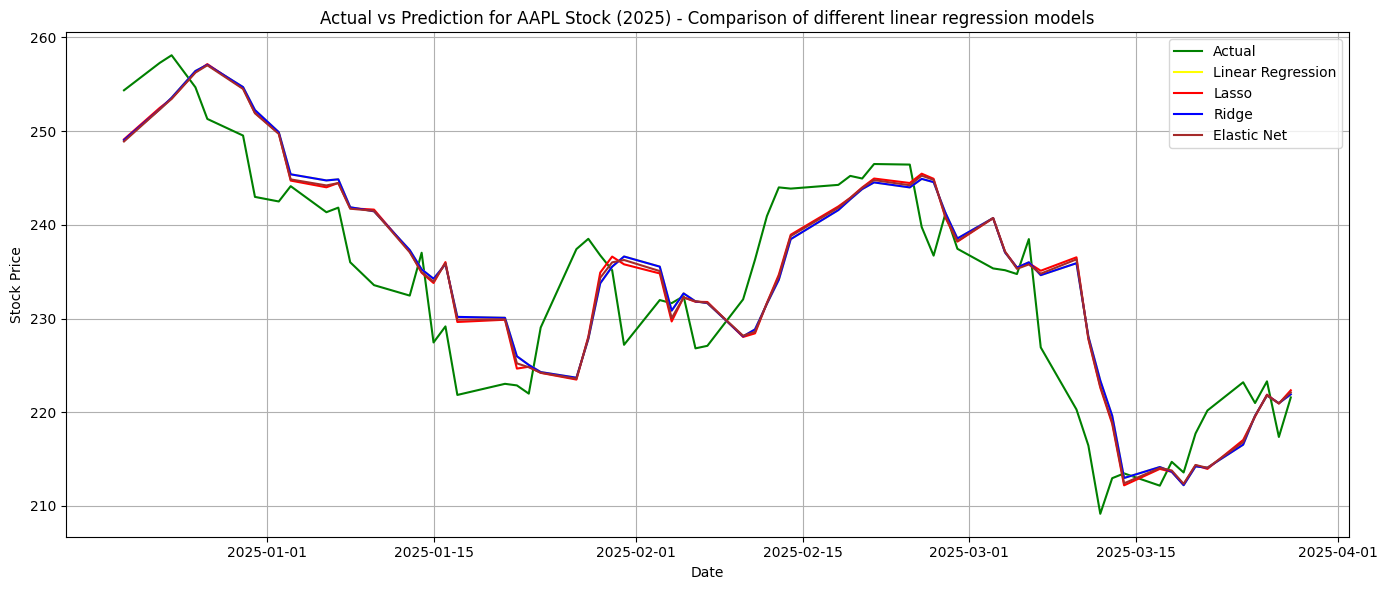

In [53]:
plt.figure(figsize = (14,6))
plt.plot(df_result_lr.index, df_result_lr['Actual'], label = 'Actual', color = 'green')
plt.plot(df_result_lr.index, df_result_lr['Predicted'], label = 'Linear Regression', color = 'yellow')
plt.plot(df_result_lasso.index, df_result_lasso['Predicted'], label = 'Lasso', color = 'red')
plt.plot(df_result_ridge.index, df_result_ridge['Predicted'], label = 'Ridge', color = 'blue')
plt.plot(df_result_elasticnet.index, df_result_elasticnet['Predicted'], label = 'Elastic Net', color = 'brown')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Comparison of different linear regression models")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

### 5) Compare the models - R square, mse, rmse

In [54]:
r2_lr = r2_score(Y_test, y_pred_lr)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

r2_lasso = r2_score(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

r2_ridge = r2_score(Y_test, y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

r2_en = r2_score(Y_test, y_pred_elasticnet)
mse_en = mean_squared_error(Y_test, y_pred_elasticnet)
rmse_en = np.sqrt(mse_en)

print("R Square / MSE / RMSE")
print(f"Linear Regression: {r2_lr} / {mse_lr} / {rmse_lr}")
print(f"Lasso: {r2_lasso} / {mse_lasso} / {rmse_lasso}")
print(f"Ridge: {r2_ridge} / {mse_ridge} / {rmse_ridge}")
print(f"Elastic Net: {r2_en} / {mse_en} / {rmse_en}")

R Square / MSE / RMSE
Linear Regression: 0.7443336167619818 / 35.988272665196114 / 5.999022642497369
Lasso: 0.7525513771910421 / 34.83151908941235 / 5.901823369892762
Ridge: 0.7443736788898343 / 35.98263341469145 / 5.998552609979464
Elastic Net: 0.751332200762018 / 35.003133570749355 / 5.916344612237302
